<a href="https://colab.research.google.com/github/Pavancode-py/My-work-of-practice/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv('/content/titanic.csv')
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [3]:
len(data)

891

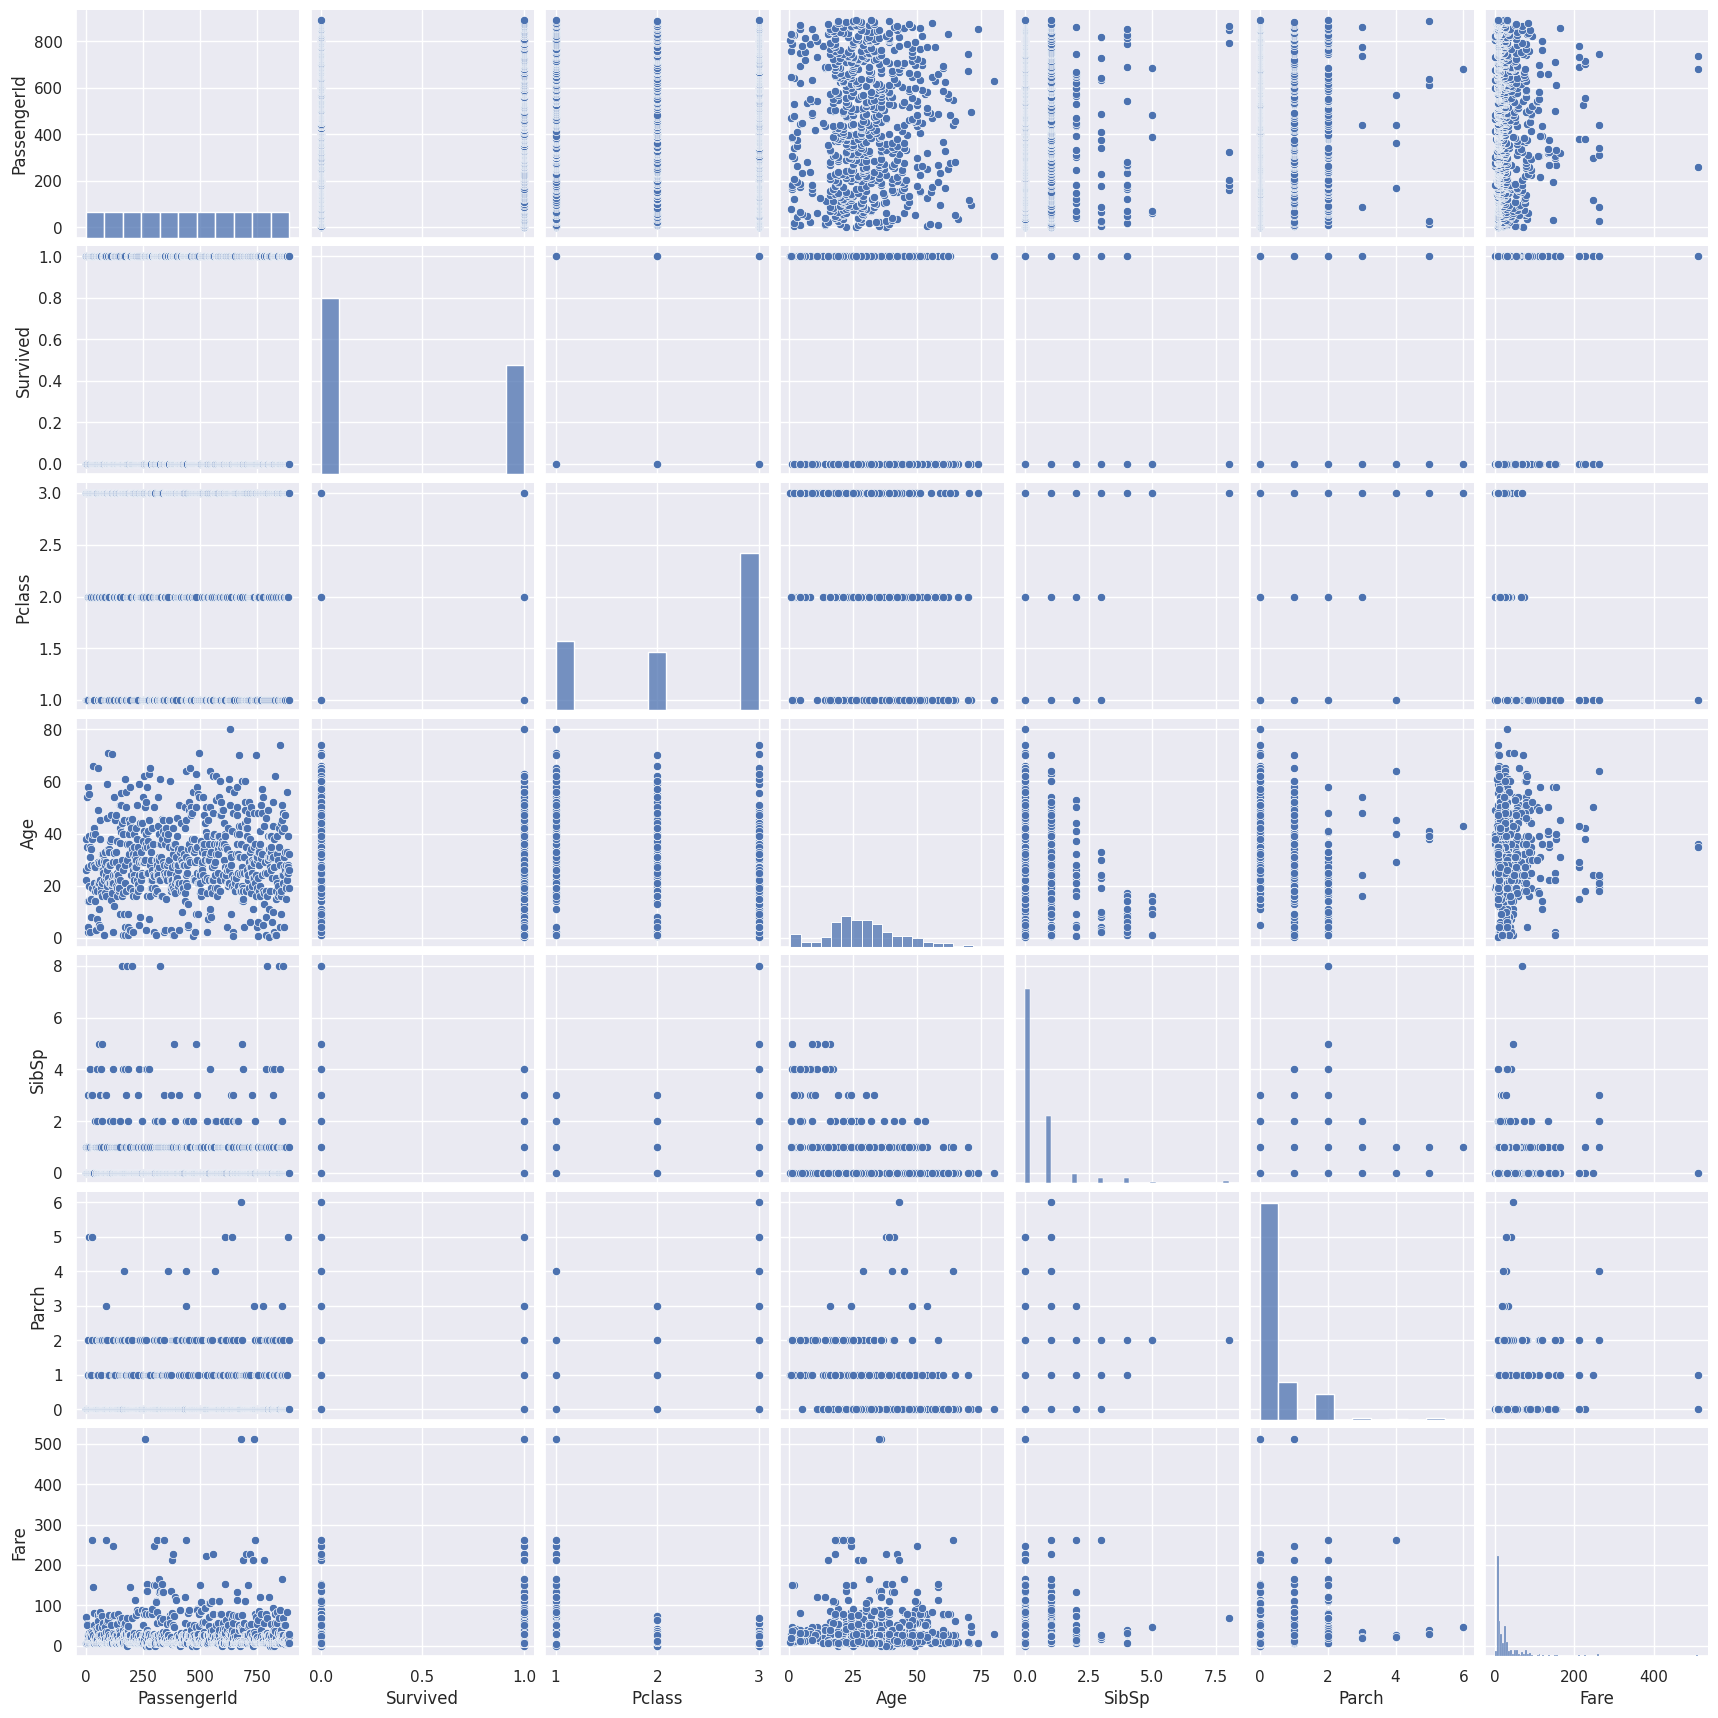

In [4]:
# Analyzing the data

sns.pairplot(data)

<Axes: >

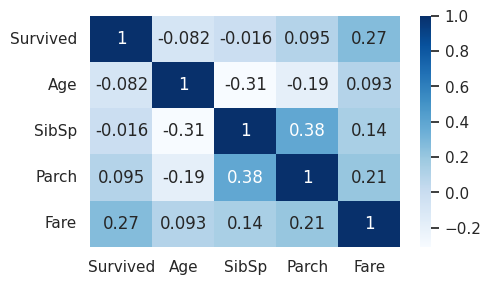

In [33]:
plt.figure(figsize=(5,3))
# Select only numerical features for correlation calculation
numerical_df = data.select_dtypes(include=np.number)
sns.heatmap(numerical_df.corr(), annot=True, cmap='Blues')

<Axes: xlabel='Survived', ylabel='count'>

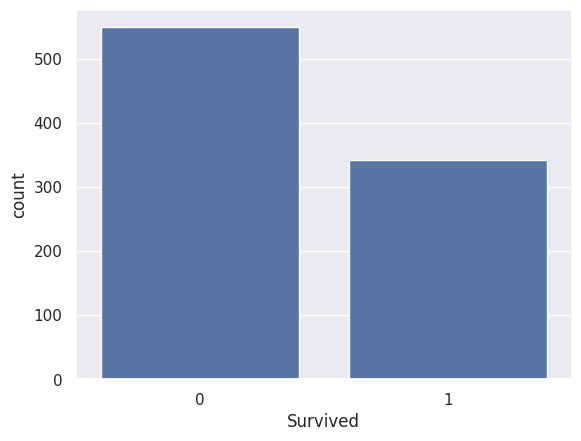

In [5]:
# checking count how many people survied and not survived
sns.countplot(x='Survived', data=data)

<Axes: xlabel='Survived', ylabel='count'>

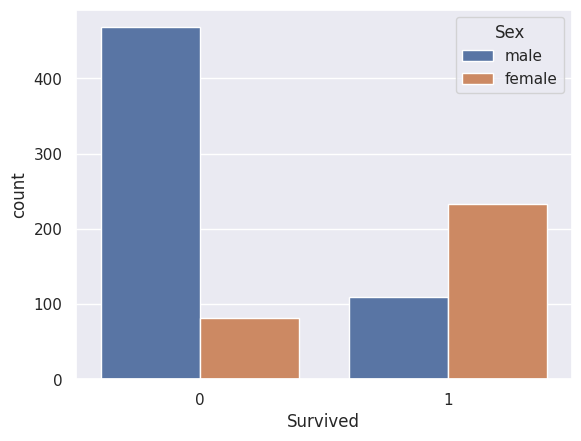

In [6]:

# checking how many people survived and not survived gender wise.

sns.countplot(x='Survived', hue='Sex', data=data)

<Axes: xlabel='Survived', ylabel='count'>

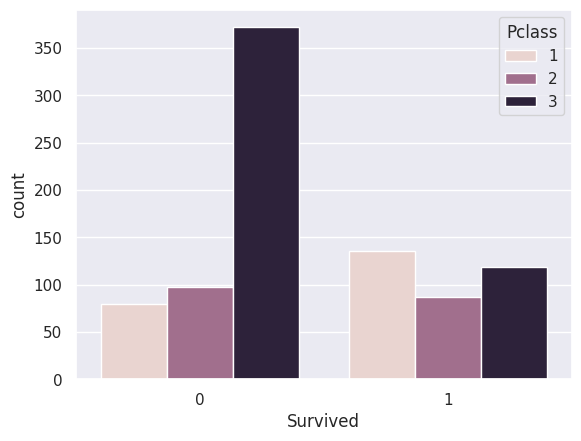

In [7]:
# checking the survival and non-survival count using the Passenger class.

sns.countplot(x='Survived', hue='Pclass', data=data)

<Axes: ylabel='Frequency'>

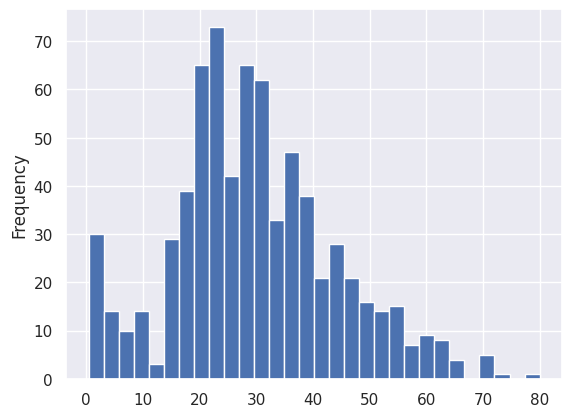

In [8]:
data['Age'].plot.hist(bins=30)

<Axes: >

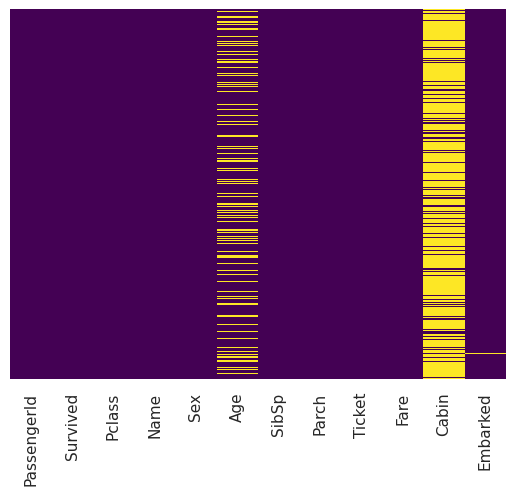

In [9]:
sns.heatmap(data.isnull(), yticklabels= False, cbar=False, cmap='viridis')

In [10]:
data.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [11]:
# Drropping the null values columns
# Check if 'data' is a DataFrame before proceeding
if isinstance(data, pd.DataFrame):
    data.drop(['Cabin'], axis=1, inplace=True)  # Use inplace=True to modify the DataFrame directly
    data.tail()
else:
    print("Error: 'data' is not a Pandas DataFrame. Please check previous operations.")

In [12]:
data=data.dropna()
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<Axes: >

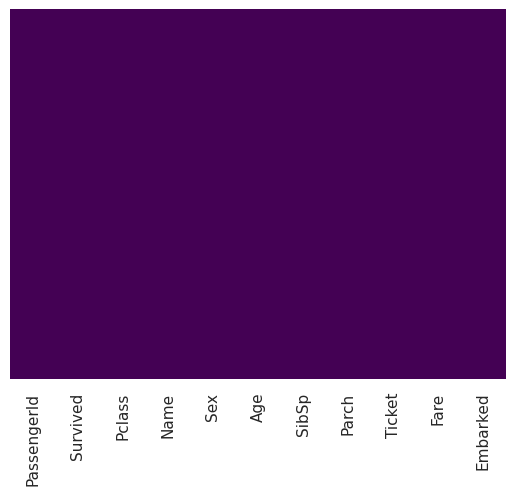

In [13]:
sns.heatmap(data.isnull(), yticklabels= False, cbar=False, cmap='viridis')

In [14]:
# DATA Cleaning  converting to the cateogrical data of Embark,sex and Pclass

sex = pd.get_dummies(data['Sex'],drop_first=True)
embark = pd.get_dummies(data['Embarked'],drop_first=True)
Pcl = pd.get_dummies(data['Pclass'],drop_first=True)


In [15]:
data = pd.concat([data,sex,embark,Pcl],axis=1)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,True,False,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,False,False,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,False,False,True,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,False,False,True,False,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,True,False,True,False,True


In [16]:
data.drop(['Sex','Embarked','PassengerId','Name', 'Ticket','Pclass'],axis=1,inplace=True)
data.head()


,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,True,False,True,False,True
1,1,38.0,1,0,71.2833,False,False,False,False,False
2,1,26.0,0,0,7.9250,False,False,True,False,True
3,1,35.0,1,0,53.1000,False,False,True,False,False
4,0,35.0,0,0,8.0500,True,False,True,False,True


In [17]:
# Declare X and Y colums

X = data.drop("Survived",axis=1)
y = data["Survived"]

In [18]:
X.shape

(712, 9)

In [19]:
y.shape

(712,)

In [20]:
# Train_test and split the data

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [21]:
from sklearn.linear_model import LogisticRegression



In [22]:
# Convert all column names to strings
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)  # Apply to X_test as well for consistency

# Now, fit the model
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
predictions = logmodel.predict(X_test)


In [24]:
from sklearn.metrics import confusion_matrix

In [25]:
confusion_matrix = confusion_matrix(y_test, predictions)
confusion_matrix

array([[108,  20],
       [ 24,  62]])

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
accuracy_score(y_test, predictions)

0.794392523364486